In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
years = range(2013, 2021)
monthes = range(1, 13)
for y in years:
  yearly_rides = []
  for m in monthes:
    if y >= 2017:
      suffix = '.csv'
    else:
      suffix = ''
    input_path = 'https://s3.amazonaws.com/tripdata/{}{:02d}-citibike-tripdata{}.zip'.format(y, m, suffix)
    print(input_path)
    try:
      df = pd.read_csv(input_path, na_values=['\\N'])
      df['starttime'] = pd.to_datetime(df['starttime'], infer_datetime_format=True)
      df['date'] = df['starttime'].dt.date
      df['gender'].loc[df['gender'] == 0] = None
      df = df[['tripduration', 'date', 'usertype', 'birth year', 'gender']]
      yearly_rides.append(df)
    except:
      continue

  yearly_rides_df = pd.concat(yearly_rides)
  path = '/content/drive/My Drive/SJSU Masters/CMPE 255/CMPE 255 Project/data/citibikes/rides_{}.csv'.format(y)
  yearly_rides_df.to_csv(path, index=False)

https://s3.amazonaws.com/tripdata/201301-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201302-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201303-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201304-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201305-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201306-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201307-citibike-tripdata.zip


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


https://s3.amazonaws.com/tripdata/201308-citibike-tripdata.zip


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


https://s3.amazonaws.com/tripdata/201309-citibike-tripdata.zip


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


https://s3.amazonaws.com/tripdata/201310-citibike-tripdata.zip


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


https://s3.amazonaws.com/tripdata/201311-citibike-tripdata.zip


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


https://s3.amazonaws.com/tripdata/201312-citibike-tripdata.zip


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


FileNotFoundError: ignored

In [3]:
rides_tmp = []
years = range(2017, 2021)
for y in years:
  rides_y = pd.read_csv('/content/drive/My Drive/SJSU Masters/CMPE 255/CMPE 255 Project/data/citibikes/rides_{}.csv'.format(y), index_col=0)
  rides_tmp.append(rides_y)

rides = pd.concat(rides_tmp)
rides

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,usertype,birth year,gender
tripduration,,,,
195,2017-04-01,Subscriber,1966.0,1.0
585,2017-04-01,Subscriber,1995.0,1.0
665,2017-04-01,Subscriber,1987.0,1.0
262,2017-04-01,Subscriber,1961.0,1.0
134,2017-04-01,Subscriber,1967.0,2.0
...,...,...,...,...
1562,2020-08-31,Customer,2001.0,1.0
1023,2020-08-31,Customer,1993.0,2.0
600,2020-08-31,Subscriber,2002.0,1.0


### 2019-2020 Bike Rides

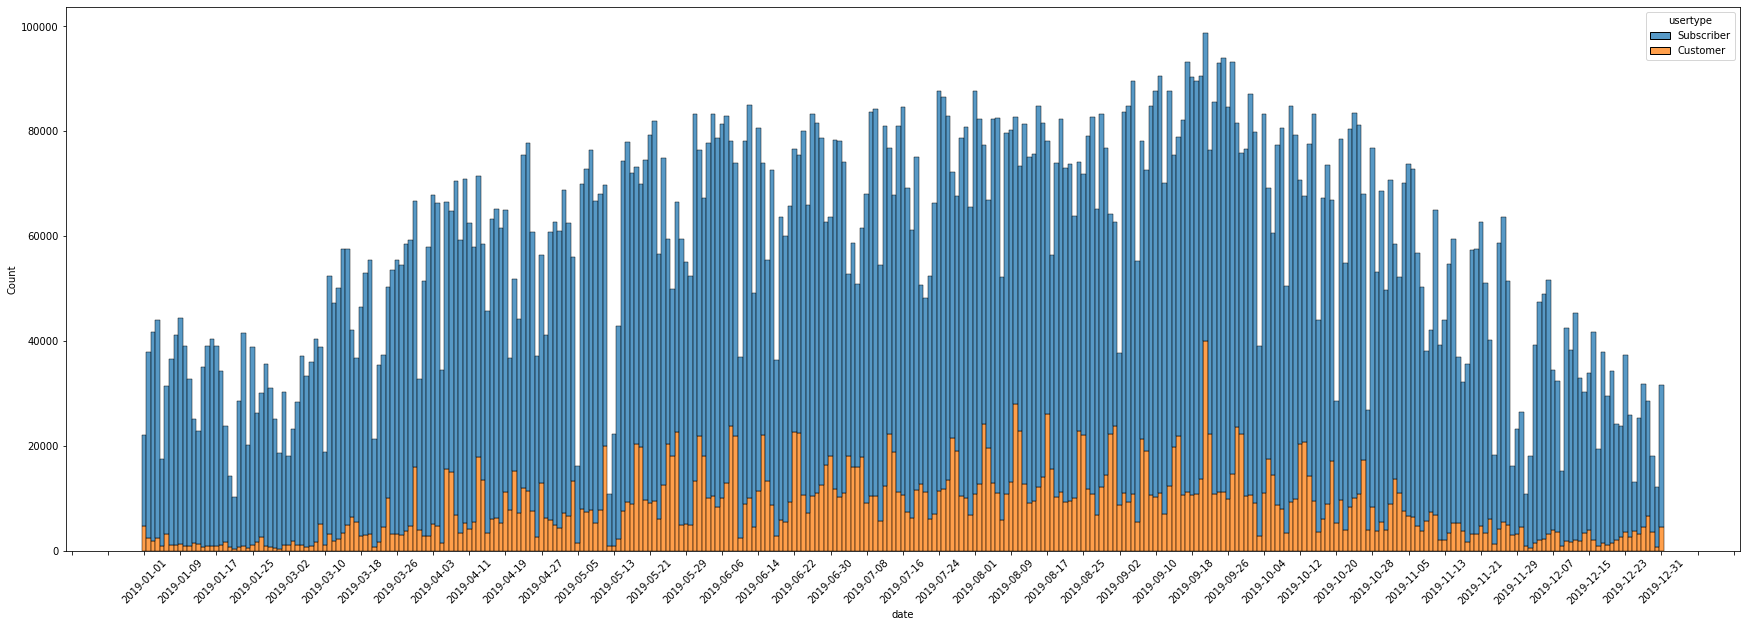

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=rides, x="date", hue="usertype", multiple="stack", ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(52))
plt.xticks(rotation=45)
plt.show()

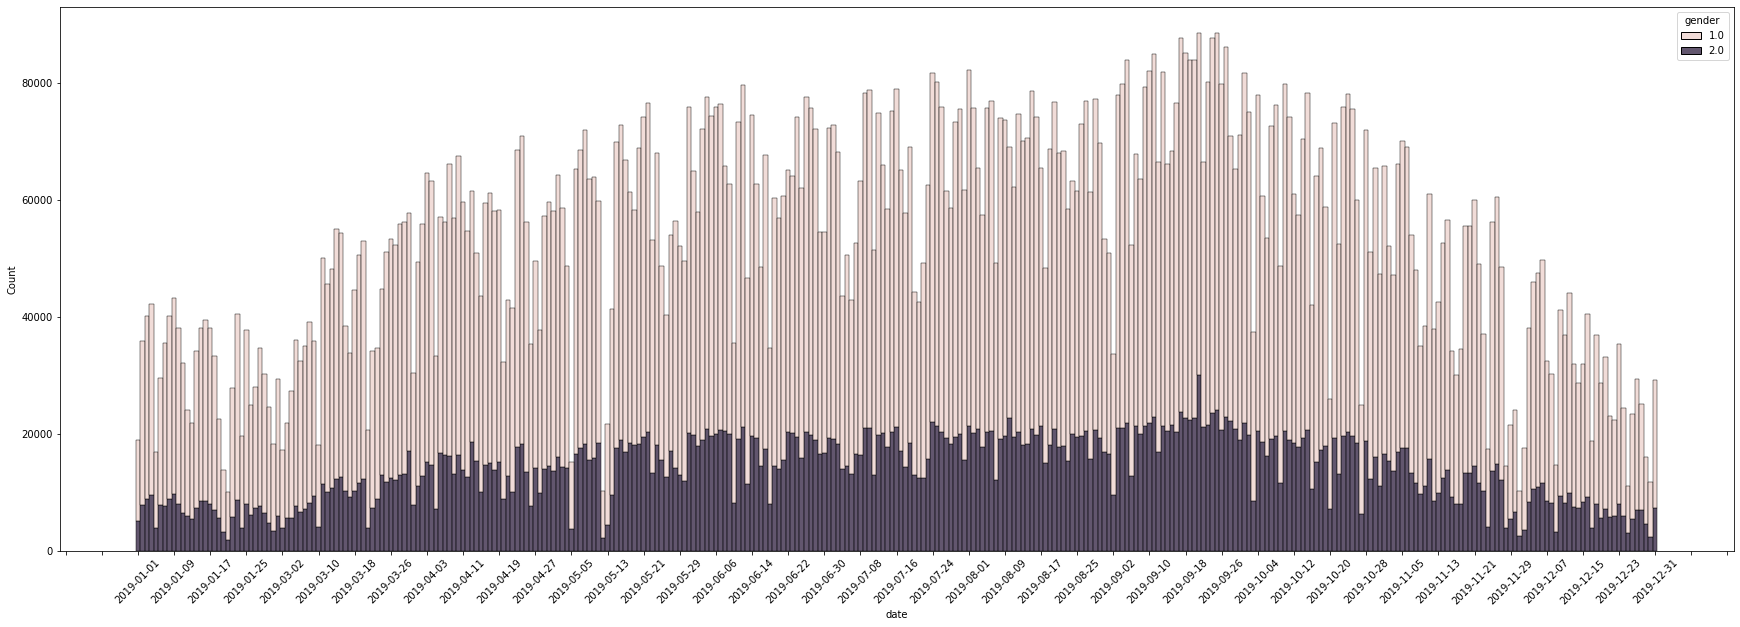

In [ ]:
# 1=male; 2=female
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=rides, x="date", hue="gender", multiple="stack", ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(52))
plt.xticks(rotation=45)
plt.show()

### 2015-2020 Bike Rides

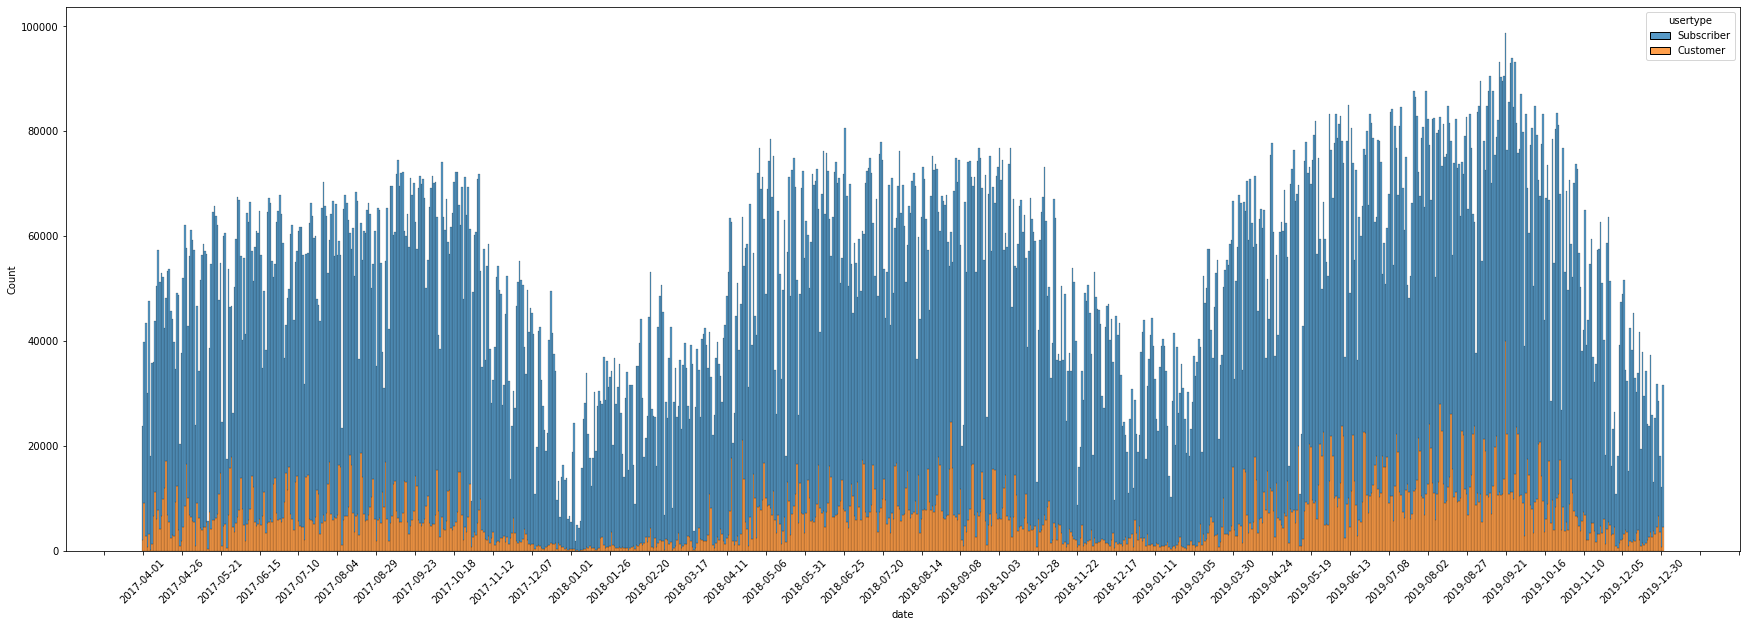

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.histplot(data=rides, x="date", hue="usertype", multiple="stack", ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(52))
plt.xticks(rotation=45)
plt.show()

# Get counts

In [ ]:
rides_y = pd.read_csv('/content/drive/My Drive/SJSU Masters/CMPE 255/CMPE 255 Project/data/citibikes/rides_{}.csv'.format(2020), index_col=0)
rides = pd.DataFrame(rides_y.groupby(['date', 'usertype'], as_index=False)['gender'].count())
rides.columns = ['date', 'usertype', 'numrides']

path = '/content/drive/My Drive/SJSU Masters/CMPE 255/CMPE 255 Project/data/citibikes/rides_count_agg_{}.csv'.format(2020)
rides.to_csv(path, index=False)

# years = range(2013, 2021)
# for y in years:
#   rides_y = pd.read_csv('/content/drive/My Drive/SJSU Masters/CMPE 255/CMPE 255 Project/data/citibikes/rides_{}.csv'.format(y), index_col=0)
#   rides = pd.DataFrame(rides_y.groupby(['date', 'usertype'], as_index=False)['gender'].count())
#   rides.columns = ['date', 'usertype', 'numrides']
#   path = '/content/drive/My Drive/SJSU Masters/CMPE 255/CMPE 255 Project/data/citibikes/rides_count_agg_{}.csv'.format(y)
#   rides.to_csv(path, index=False)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
